Accuracy: 0.927710843373494
              precision    recall  f1-score   support

       False       0.94      0.99      0.96        74
        True       0.80      0.44      0.57         9

    accuracy                           0.93        83
   macro avg       0.87      0.72      0.77        83
weighted avg       0.92      0.93      0.92        83



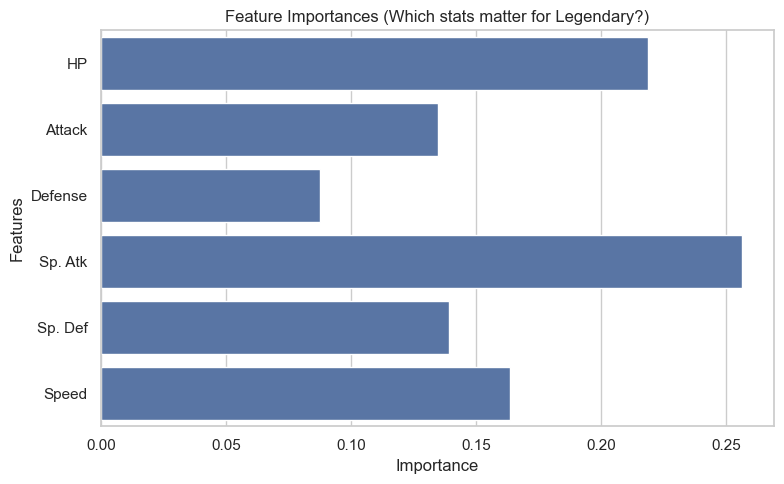

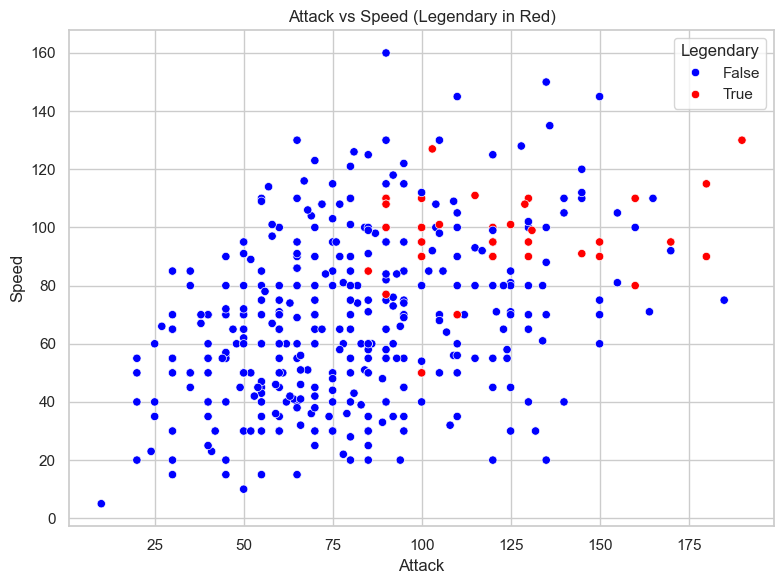

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# データ読み込み
df = pd.read_csv("pokemon.csv")  # 今は同じ階層にあるのでこれでOK

# 必要な列だけ抽出（目的：伝説分類）
df = df.dropna()
X = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
y = df["Legendary"]

# 学習・テストに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル作成＆訓練
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 評価
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量の重要度を取得
importances = clf.feature_importances_
features = X.columns

# グラフ化
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Which stats matter for Legendary?)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# 攻撃力と素早さで伝説ポケモンを可視化
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Attack"],
    y=df["Speed"],
    hue=df["Legendary"],
    palette={True: "red", False: "blue"}
)

plt.title("Attack vs Speed (Legendary in Red)")
plt.xlabel("Attack")
plt.ylabel("Speed")
plt.legend(title="Legendary")
plt.tight_layout()
plt.show()


# ユーザーが入力した値から伝説かどうかを予測する関数
def predict_legendary(hp, attack, defense, sp_atk, sp_def, speed):
    input_data = [[hp, attack, defense, sp_atk, sp_def, speed]]
    prediction = clf.predict(input_data)[0]
    return prediction


import pickle

# モデルを保存（上書きOK）
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)


In [6]:
predict_legendary(106, 110, 90, 154, 90, 130)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


True

In [8]:
# 保存したモデルを読み込み
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# 読み込んだモデルでもちゃんと予測できるか確認
loaded_model.predict([[106, 110, 90, 154, 90, 130]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([ True])